# Hi!

In today's workshop we are going to learn about most known concept of supervised learning which is `classification`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
print(load_breast_cancer().DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [10]:
X, y = load_breast_cancer(True)

In [11]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.66)

/home/unj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


###### What is classification?

Classification is a problem of predicting discrete value (classes) for given features. It is mainly viewed as a supervised learning problem.

###### What about applying linear regression for classification?

In [12]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
X_train[0]

array([  1.32700000e+01,   1.47600000e+01,   8.47400000e+01,
         5.51700000e+02,   7.35500000e-02,   5.05500000e-02,
         3.26100000e-02,   2.64800000e-02,   1.38600000e-01,
         5.31800000e-02,   4.05700000e-01,   1.15300000e+00,
         2.70100000e+00,   3.63500000e+01,   4.48100000e-03,
         1.03800000e-02,   1.35800000e-02,   1.08200000e-02,
         1.06900000e-02,   1.43500000e-03,   1.63600000e+01,
         2.23500000e+01,   1.04500000e+02,   8.30600000e+02,
         1.00600000e-01,   1.23800000e-01,   1.35000000e-01,
         1.00100000e-01,   2.02700000e-01,   6.20600000e-02])

In [13]:
linear_reg.predict(X_val)

array([ 1.12890406, -0.75982514,  0.7797129 ,  1.11675055,  1.07550052,
        0.98115879,  1.0884098 ,  0.72365553,  1.01899011,  0.85958331,
        0.92743527,  0.89992154,  0.50901931,  0.9760303 ,  0.78044886,
        0.99224188,  0.91129511,  0.95055478,  0.60563514, -0.56237837,
        1.08374177,  1.22900242,  0.80305438,  0.35649295,  0.75297332,
        0.33580637,  1.0181178 ,  0.6486568 ,  0.9294009 ,  1.01451736,
        0.98041571,  1.027543  ,  0.05907204,  0.49321317,  0.88601904,
        0.56698681,  0.9848946 , -0.35675401,  0.30485255, -0.21012744,
        0.41459187,  0.85654807,  0.82445342,  0.77544515,  0.53067135,
        0.60107687,  0.98999042,  1.00632679, -0.16054796,  0.61282139,
        0.92755907,  0.92208503, -0.26599641,  1.24774341,  0.60999864,
        0.72670489,  0.84803705, -0.32747872, -0.12564655,  0.28803909,
        1.00126318,  0.33112022,  0.03453548,  0.69393389,  0.89752614,
        0.07805354,  0.66183127,  0.21053241,  0.15457481,  0.10

How to interpret these predictions? Maybe we need something different?

###### What is logistic regression?

Logistic regression is about applying "squashing" function to the hypotheses.

$$\hat{y} = h_w(x)$$ 

$$h_w(x) = \sum_{j=0}^k w_j x_j = wx$$

$$\hat{y} = \sigma(h_w(x))$$ 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [43]:
x = np.linspace(-10, 10)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

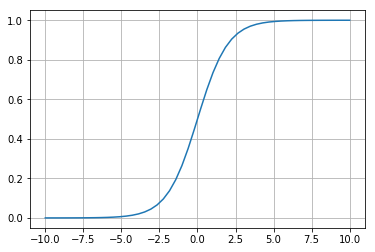

In [44]:
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.show()

In [45]:
sigmoid(np.inf), sigmoid(-np.inf)

(1.0, 0.0)

What about loss? Is MSE still applicable? 

There are reasons why we are not using MSE. Instead we use log-loss.

$$ L(w) = -\sum_{i=0}^n y^{(i)}\log{h_w(x^{(i)})} + (1-y^{(i)})\log{(1-h_w(x^{(i)}))}$$

$$ y^{(i)} \in \{0, 1\}$$

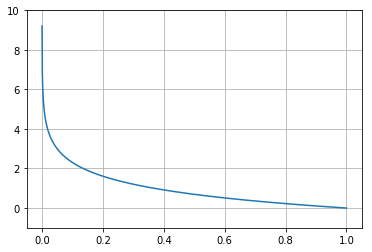

In [46]:
# y = 1

x = np.linspace(0.0001, 1, 1000)
plt.plot(x, -np.log(x))
plt.ylim(-1, 10)
plt.grid(True)
plt.show()

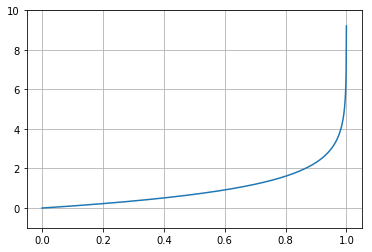

In [47]:
# y = 0

x = np.linspace(0, 0.9999, 1000)
plt.plot(x, -np.log(1 - x))
plt.ylim(-1, 10)
plt.grid(True)
plt.show()

What about gradient descent procedure? How does it change? Let's derive gradient on blackboard.

In [16]:
from importlib import reload

In [17]:
import solutions

In [18]:
solutions = reload(solutions)

In [19]:
def add_bias_feature(X):
       return np.c_[np.ones(len(X)), X]
X_train = add_bias_feature(X_train)

In [22]:
W = np.zeros(X_train.shape[1])

In [23]:
for _ in range(10000):
#     print(solutions.cost(W, X_train, y_train))
    W = solutions.gradient_step(W, X_train, y_train, 0.0001)
   

/home/unj/BIT_AI/2017_11_06_lab3/solutions.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(solutions._hypotheses(W, X_train) >= 0.5, y_train)

/home/unj/BIT_AI/2017_11_06_lab3/solutions.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.91959798994974873

In [32]:
from sklearn.linear_model import LogisticRegression

In [39]:
logistic_reg = LogisticRegression(C=10**6)

In [40]:
logistic_reg.fit(X_train, y_train)
logistic_reg.score(X_train, y_train)

0.98743718592964824

###### How to deal with overfitting?

###### How to measure performance of our model?